In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-05-08 10:41:45.605661: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_7000_images.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
0,-0.206139,0.019858,343.905002,2451.507694,1023.181497,1024.397491,6.762046,7.047165,76.475700,74.968022,...,-21.813454,-20.123533,51.879997,98.059998,144.080002,62.809998,51.439999,62.849998,20161014T135100Z,20161014T152958.125000Z
1,-0.227366,0.036945,322.459999,2451.771327,1023.577427,1024.794501,6.575395,6.833194,74.707349,73.294888,...,-21.813454,-20.123533,51.879997,98.059998,144.080002,62.809998,51.439999,62.849998,20161014T135100Z,20161014T152958.125000Z
2,-0.034786,-0.033168,307.705002,2452.064453,1025.096147,1026.312994,6.484017,6.711902,71.141400,69.848437,...,-8.723687,-12.308812,117.649994,72.750000,27.680000,36.759998,27.459999,36.739998,20161014T235700Z,20161015T013858.125000Z
3,-0.012377,-0.102068,304.399997,2452.066665,1025.821253,1027.037988,6.368535,6.619516,69.104550,67.615744,...,-8.723687,-12.308812,117.649994,72.750000,27.680000,36.759998,27.459999,36.739998,20161014T235700Z,20161015T013858.125000Z
4,-0.061342,-0.196020,297.654999,2452.234680,1026.502979,1027.719995,6.034159,6.264792,64.672649,63.218720,...,-18.114204,-21.154348,-144.369995,-98.279999,-52.160000,61.489998,49.980000,61.379997,20161015T005100Z,20161015T023258.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-18.908571,-21.115072,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z
7832,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
7833,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
7834,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-13.120513,-17.850687,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
0,-0.206139,0.019858,343.905002,2451.507694,1023.181497,1024.397491,6.762046,7.047165,76.475700,74.968022,...,-21.813454,-20.123533,51.879997,98.059998,144.080002,62.809998,51.439999,62.849998,20161014T135100Z,20161014T152958.125000Z
1,-0.227366,0.036945,322.459999,2451.771327,1023.577427,1024.794501,6.575395,6.833194,74.707349,73.294888,...,-21.813454,-20.123533,51.879997,98.059998,144.080002,62.809998,51.439999,62.849998,20161014T135100Z,20161014T152958.125000Z
2,-0.034786,-0.033168,307.705002,2452.064453,1025.096147,1026.312994,6.484017,6.711902,71.141400,69.848437,...,-8.723687,-12.308812,117.649994,72.750000,27.680000,36.759998,27.459999,36.739998,20161014T235700Z,20161015T013858.125000Z
3,-0.012377,-0.102068,304.399997,2452.066665,1025.821253,1027.037988,6.368535,6.619516,69.104550,67.615744,...,-8.723687,-12.308812,117.649994,72.750000,27.680000,36.759998,27.459999,36.739998,20161014T235700Z,20161015T013858.125000Z
4,-0.061342,-0.196020,297.654999,2452.234680,1026.502979,1027.719995,6.034159,6.264792,64.672649,63.218720,...,-18.114204,-21.154348,-144.369995,-98.279999,-52.160000,61.489998,49.980000,61.379997,20161015T005100Z,20161015T023258.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-18.908571,-21.115072,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z
7832,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
7833,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
7834,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-13.120513,-17.850687,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
4616,-0.212591,0.033056,317.435001,2453.413811,1021.695852,1022.897501,7.837940,8.128143,73.431650,71.919129,...,-9.259923,-18.103456,-146.619995,-101.379997,-56.129997,38.649998,29.049999,38.570000,20171001T003300Z,20171001T021458.125000Z
1343,-0.010394,0.068287,275.750003,2477.649111,1018.041601,1019.268491,6.465923,6.501260,87.993151,87.720825,...,-14.634385,-19.825636,-145.319992,-99.459999,-53.599998,53.599998,42.279999,53.489998,20160807T222100Z,20160808T000258.125000Z
2387,0.009946,-0.040725,260.600000,2485.666992,999.364740,1000.584503,5.132976,5.168823,86.275150,85.875263,...,-16.133415,-23.069387,102.290001,57.660000,13.120000,58.520000,47.399998,58.419998,20170620T203300Z,20170620T221458.125000Z
6531,-0.012150,-0.032903,336.120000,2488.033556,998.462788,999.682004,5.023869,5.044653,84.749854,84.338300,...,-8.220165,-15.486308,-148.389999,-102.970001,-57.469997,40.719997,30.639999,40.369999,20210602T221200Z,20210602T235358.125000Z
519,-0.353769,0.214690,269.614998,2485.442853,1015.807711,1017.042999,5.168041,5.211821,85.058499,84.416434,...,-21.326450,-25.905455,115.239998,70.389999,25.500000,53.969997,42.860001,53.919998,20170402T233900Z,20170403T012058.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,0.009946,-0.040725,322.444998,2489.806192,1007.436923,1008.677002,4.278741,4.314658,84.712201,84.321065,...,-8.807202,-9.574754,56.969997,102.419998,147.839996,41.450001,31.429998,41.459999,20170602T123000Z,20170602T141158.125000Z
2004,0.009946,-0.040725,293.210002,2489.746854,1004.096537,1005.338986,3.606318,3.640010,78.287801,77.963497,...,-23.715761,-29.589462,51.449997,97.720001,143.830002,58.889999,47.389999,58.899998,20161129T121200Z,20161129T135358.125000Z
3668,0.331256,0.113300,265.347367,2486.922484,975.641904,976.844736,3.360893,3.448799,67.604340,66.403031,...,-18.298937,-19.266027,-164.129990,-119.549995,-74.970001,63.259998,52.329998,63.399998,20161103T042400Z,20161103T060558.125000Z
607,-0.097369,-0.199513,313.725000,2477.914534,1005.642469,1006.841989,7.729385,7.670405,88.209650,86.800359,...,-21.732422,-25.840063,53.539997,99.419998,145.139999,54.770000,43.459999,54.770000,20170507T140300Z,20170507T154158.125000Z


In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

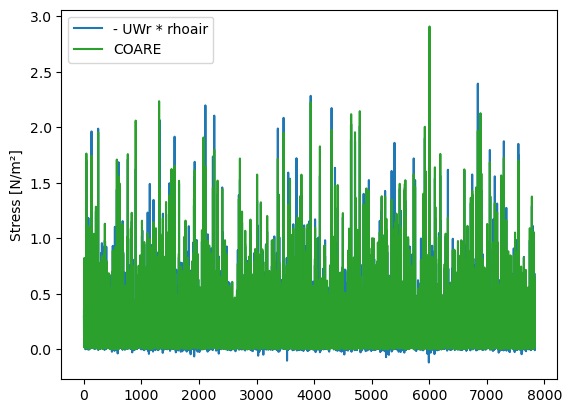

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

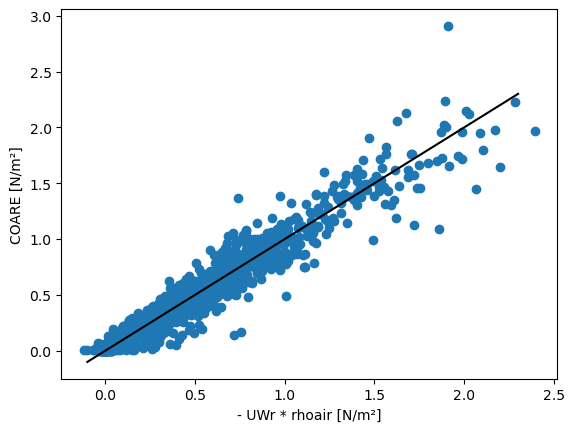

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(7836, 65)

In [13]:
df.shape[0]*0.8

6268.8

In [14]:
split_idx = 2522

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft'
]

In [16]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft
4616,-12.985937,-9.259923,-18.103456,-146.619995,-101.379997,-56.129997,38.649998,29.049999,38.570000
1343,-13.876206,-14.634385,-19.825636,-145.319992,-99.459999,-53.599998,53.599998,42.279999,53.489998
2387,-18.097216,-16.133415,-23.069387,102.290001,57.660000,13.120000,58.520000,47.399998,58.419998
6531,-9.436129,-8.220165,-15.486308,-148.389999,-102.970001,-57.469997,40.719997,30.639999,40.369999
519,-26.697325,-21.326450,-25.905455,115.239998,70.389999,25.500000,53.969997,42.860001,53.919998
...,...,...,...,...,...,...,...,...,...
2283,-14.164780,-8.807202,-9.574754,56.969997,102.419998,147.839996,41.450001,31.429998,41.459999
2004,-26.703970,-23.715761,-29.589462,51.449997,97.720001,143.830002,58.889999,47.389999,58.899998
3668,-23.838036,-18.298937,-19.266027,-164.129990,-119.549995,-74.970001,63.259998,52.329998,63.399998
607,-24.564676,-21.732422,-25.840063,53.539997,99.419998,145.139999,54.770000,43.459999,54.770000


In [17]:
y = - df['UWr'] * df['rhoair']
y

4616    0.295970
1343    0.269378
2387    0.044913
6531    0.434164
519     0.166370
          ...   
2283    0.575392
2004    0.024470
3668    0.190494
607    -0.008070
6871    0.023758
Length: 7836, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

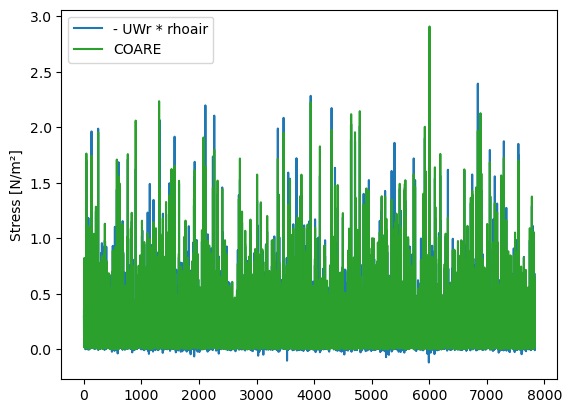

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [23]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [24]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [25]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-05-08 10:41:48.013194: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-08 10:41:48.013998: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-08 10:41:48.014008: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-08 10:41:48.014025: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-2l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-05-08 10:41:48.014568: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

56/56 [==============================] - 1s 7ms/step - loss: 2029.7538 - mean_absolute_error: 42.3304 - val_loss: 3039.0830 - val_mean_absolute_error: 33.3480
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 860.4288 - mean_absolute_error: 28.2702 - val_loss: 2204.0625 - val_mean_absolute_error: 21.3216
Epoch 3/500
56/56 [==============================] - 0s 991us/step - loss: 342.1736 - mean_absolute_error: 17.6934 - val_loss: 1927.1750 - val_mean_absolute_error: 13.1760
Epoch 4/500
56/56 [==============================] - 0s 942us/step - loss: 121.7378 - mean_absolute_error: 10.2289 - val_loss: 1876.4744 - val_mean_absolute_error: 8.0531
Epoch 5/500
56/56 [==============================] - 0s 963us/step - loss: 40.7419 - mean_absolute_error: 5.6452 - val_loss: 1888.9049 - val_mean_absolute_error: 5.1436
Epoch 6/500
56/56 [==============================] - 0s 956us/step - loss: 13.5627 - mean_absolute_error: 3.0883 - val_loss: 1905.0090 - val_mean_absolute_erro

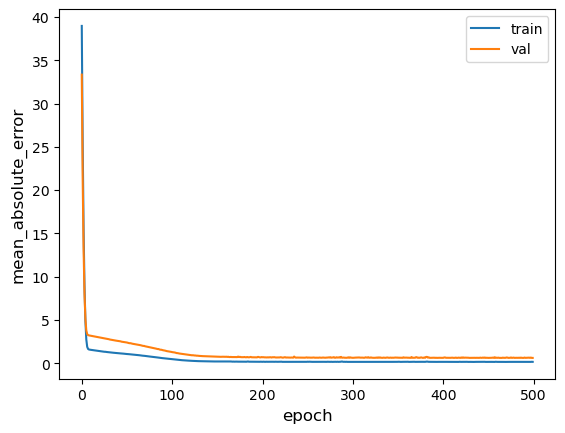

167/167 [==============================] - 0s 348us/step - loss: 58.1282 - mean_absolute_error: 0.2824
Test accuracy 0.28240200877189636
Test loss 58.128238677978516


In [26]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [27]:
y_test_pred = multi_dense_model.predict(x_test)

In [28]:
np.mean(y_test)

0.19771450335982926

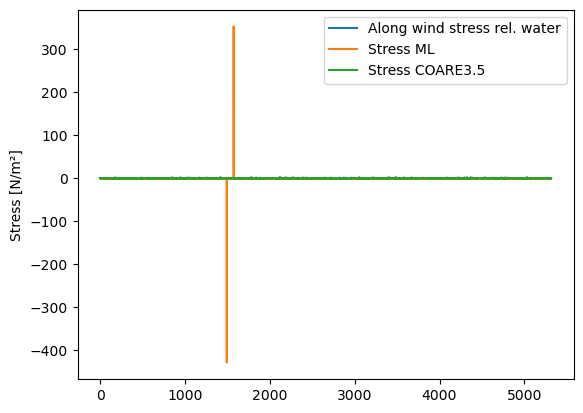

In [29]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

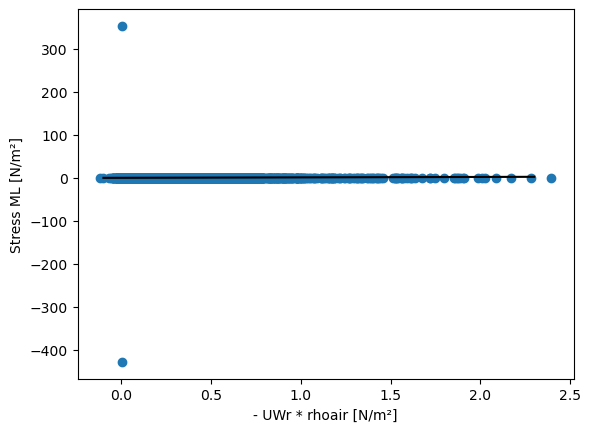

In [30]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

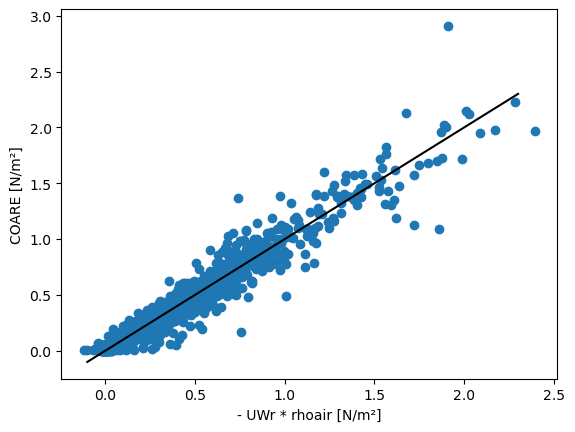

In [31]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [32]:
rmse(y_test.values, y_test_pred)

7.628847809621316

In [33]:
rmse(y_test.values, c_test)

0.05535002613750331

## Correlation

In [34]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.01819305],
       [0.01819305, 1.        ]])

In [35]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

# Other experiments

In [36]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [37]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [38]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 1.2468 - mean_absolute_error: 0.9039 - val_loss: 5.0063 - val_mean_absolute_error: 1.8859
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4550 - mean_absolute_error: 0.5360 - val_loss: 0.9461 - val_mean_absolute_error: 0.6168
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1947 - mean_absolute_error: 0.3355 - val_loss: 0.5215 - val_mean_absolute_error: 0.3849
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1192 - mean_absolute_error: 0.2579 - val_loss: 0.4442 - val_mean_absolute_error: 0.3072
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1013 - mean_absolute_error: 0.2328 - val_loss: 0.4285 - val_mean_absolute_error: 0.2595
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.0960 - mean_absolute_error: 0.2234 - val_loss: 0.4420 - val_mean_absolute_error: 0.2332
Epoch 7/500
56/56 [===

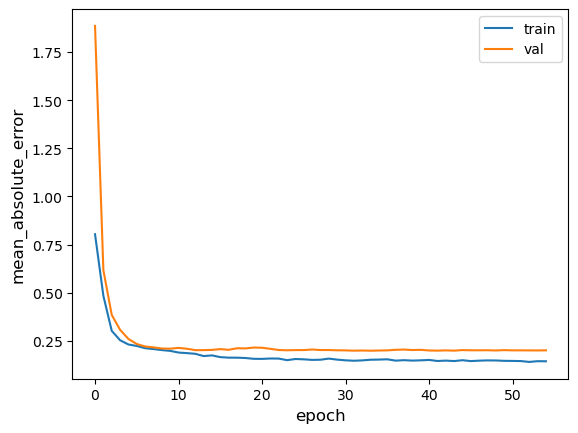

167/167 [==============================] - 0s 380us/step - loss: 1.1250 - mean_absolute_error: 0.1501
Test accuracy 0.15011180937290192
Test loss 1.1249916553497314


In [39]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [40]:
y_test_pred = multi_dense_model.predict(x_test)

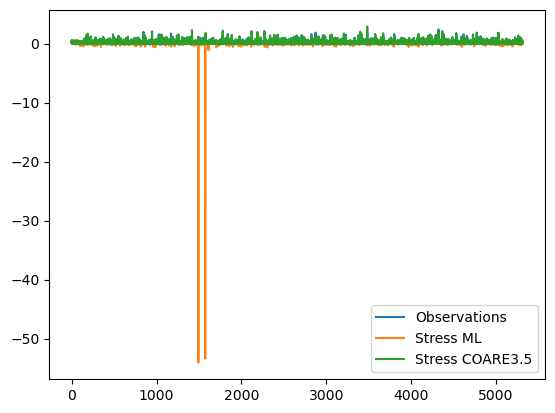

In [41]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

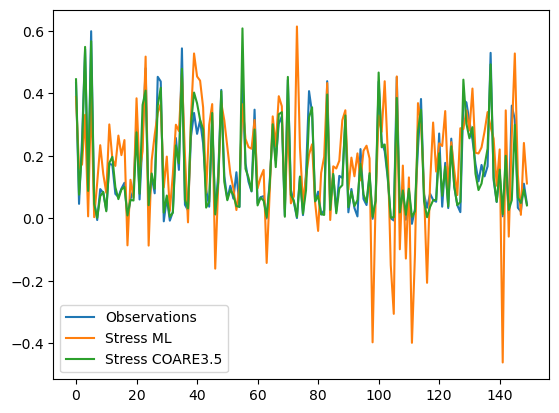

In [42]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [43]:
rmse(y_test.values, y_test_pred)

1.0924305791545208

## Correlation

In [44]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.12569213],
       [0.12569213, 1.        ]])

In [45]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

In [46]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [47]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [48]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 1s 3ms/step - loss: 0.7757 - mean_absolute_error: 0.6753 - val_loss: 17.9523 - val_mean_absolute_error: 0.7471
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5559 - mean_absolute_error: 0.5668 - val_loss: 7.3019 - val_mean_absolute_error: 0.4619
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4342 - mean_absolute_error: 0.4864 - val_loss: 4.0723 - val_mean_absolute_error: 0.3250
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3488 - mean_absolute_error: 0.4275 - val_loss: 2.9023 - val_mean_absolute_error: 0.2810
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3145 - mean_absolute_error: 0.3997 - val_loss: 2.0920 - val_mean_absolute_error: 0.2469
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2785 - mean_absolute_error: 0.3841 - val_loss: 1.6142 - val_mean_absolute_error: 0.2323
Epoch 7/500
56/56 [==

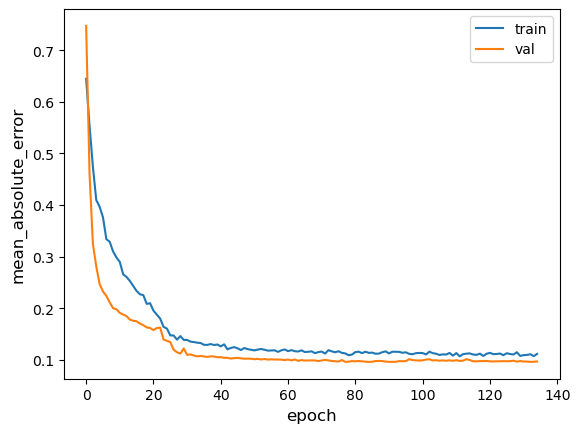

167/167 [==============================] - 0s 374us/step - loss: 0.0237 - mean_absolute_error: 0.0935
Test accuracy 0.09350307285785675
Test loss 0.023691728711128235


In [49]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [50]:
y_test_pred = multi_dense_model.predict(x_test)

In [51]:
rmse(y_test.values, y_test_pred)

0.30593534907931835

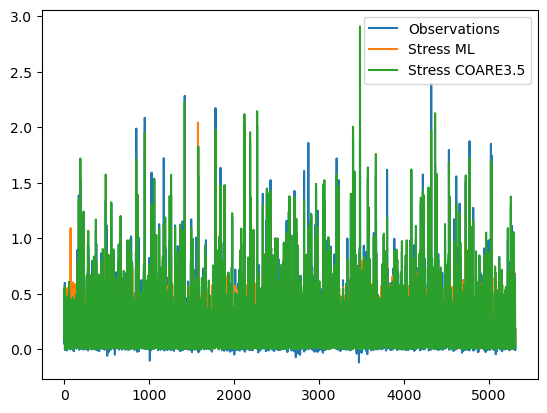

In [52]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

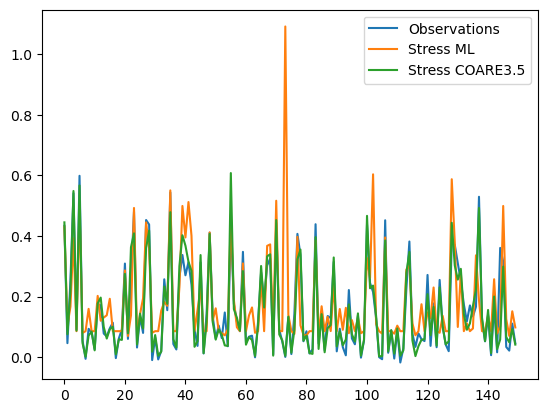

In [53]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [54]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81655977],
       [0.81655977, 1.        ]])

In [55]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

In [56]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [57]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [58]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 1.3344 - mean_absolute_error: 0.8697 - val_loss: 4.0169 - val_mean_absolute_error: 1.7040
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 1.0753 - mean_absolute_error: 0.7965 - val_loss: 1.0115 - val_mean_absolute_error: 0.7159
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.8928 - mean_absolute_error: 0.7318 - val_loss: 0.4600 - val_mean_absolute_error: 0.3939
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6841 - mean_absolute_error: 0.6552 - val_loss: 0.2591 - val_mean_absolute_error: 0.2312
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5867 - mean_absolute_error: 0.5900 - val_loss: 0.1848 - val_mean_absolute_error: 0.1727
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5263 - mean_absolute_error: 0.5516 - val_loss: 0.1531 - val_mean_absolute_error: 0.1608
Epoch 7/500
56/56 [===

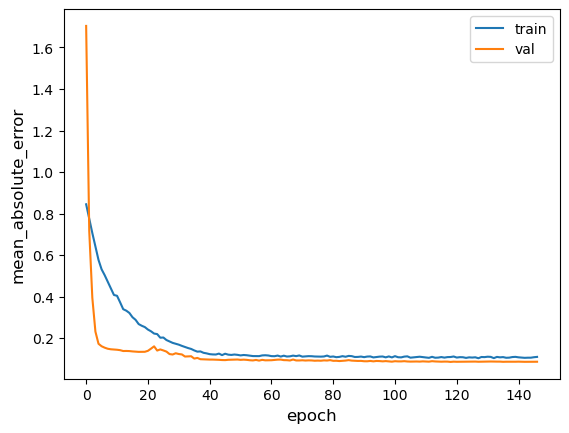

167/167 [==============================] - 0s 353us/step - loss: 0.0203 - mean_absolute_error: 0.0853
Test accuracy 0.08527075499296188
Test loss 0.020295344293117523


In [59]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [60]:
y_test_pred = multi_dense_model.predict(x_test)

In [61]:
rmse(y_test.values, y_test_pred)

0.3112270108229986

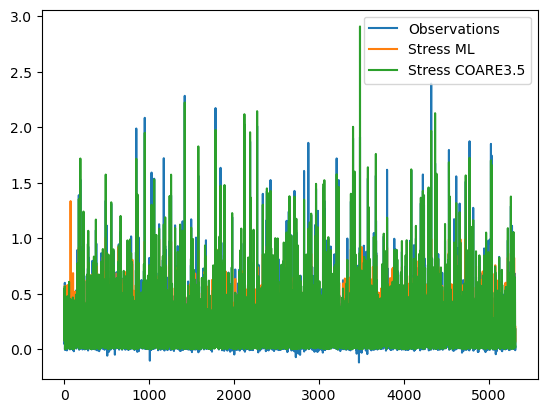

In [62]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

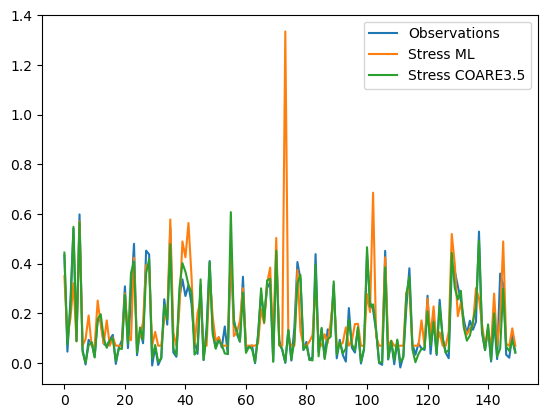

In [63]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

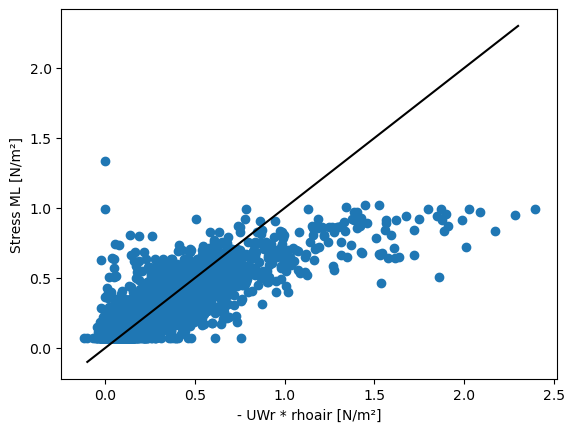

In [64]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [65]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84611758],
       [0.84611758, 1.        ]])

In [66]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

In [67]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [68]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [69]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
111/111 [==============================] - 0s 2ms/step - loss: 2.1921 - mean_absolute_error: 1.2088 - val_loss: 2.8904 - val_mean_absolute_error: 0.5796
Epoch 2/500
111/111 [==============================] - 0s 926us/step - loss: 1.0005 - mean_absolute_error: 0.7536 - val_loss: 1.4806 - val_mean_absolute_error: 0.3530
Epoch 3/500
111/111 [==============================] - 0s 918us/step - loss: 0.5955 - mean_absolute_error: 0.5816 - val_loss: 1.0107 - val_mean_absolute_error: 0.2866
Epoch 4/500
111/111 [==============================] - 0s 903us/step - loss: 0.4960 - mean_absolute_error: 0.5156 - val_loss: 0.6118 - val_mean_absolute_error: 0.2369
Epoch 5/500
111/111 [==============================] - 0s 871us/step - loss: 0.3266 - mean_absolute_error: 0.4153 - val_loss: 1.0375 - val_mean_absolute_error: 0.2288
Epoch 6/500
111/111 [==============================] - 0s 864us/step - loss: 0.2633 - mean_absolute_error: 0.3819 - val_loss: 2.8093 - val_mean_absolute_error: 0.2454


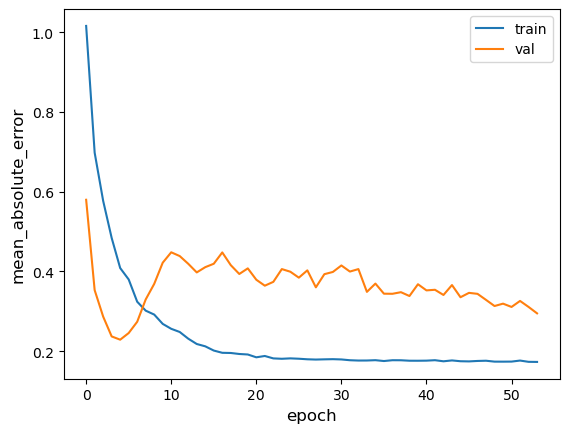

167/167 [==============================] - 0s 360us/step - loss: 1.8957 - mean_absolute_error: 0.1859
Test accuracy 0.1858992874622345
Test loss 1.8957494497299194


In [70]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [71]:
y_test_pred = multi_dense_model.predict(x_test)

In [72]:
rmse(y_test.values, y_test_pred)

1.3756122298695983

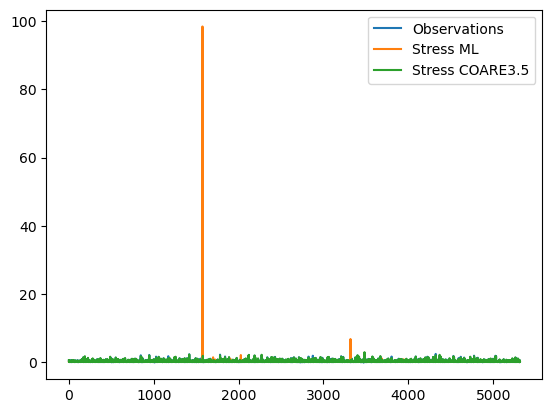

In [73]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

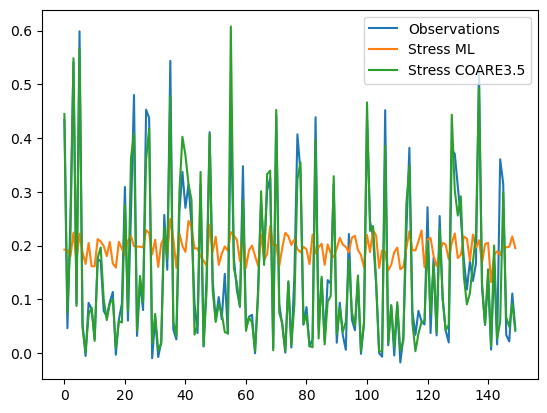

In [74]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

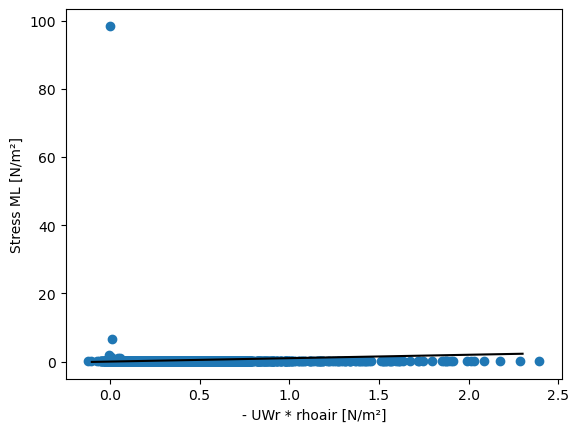

In [75]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [76]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.00496672],
       [-0.00496672,  1.        ]])

In [77]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

In [78]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [79]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [80]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
28/28 [==============================] - 0s 4ms/step - loss: 1.3134 - mean_absolute_error: 0.8942 - val_loss: 3.1274 - val_mean_absolute_error: 1.4581
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 1.0133 - mean_absolute_error: 0.7802 - val_loss: 1.2159 - val_mean_absolute_error: 0.8439
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7288 - mean_absolute_error: 0.6564 - val_loss: 0.7570 - val_mean_absolute_error: 0.6419
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6371 - mean_absolute_error: 0.6221 - val_loss: 0.5102 - val_mean_absolute_error: 0.5142
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5338 - mean_absolute_error: 0.5546 - val_loss: 0.3668 - val_mean_absolute_error: 0.4353
Epoch 6/500
28/28 [==============================] - 0s 1ms/step - loss: 0.4568 - mean_absolute_error: 0.5311 - val_loss: 0.2749 - val_mean_absolute_error: 0.3746
Epoch 7/500
28/28 [===

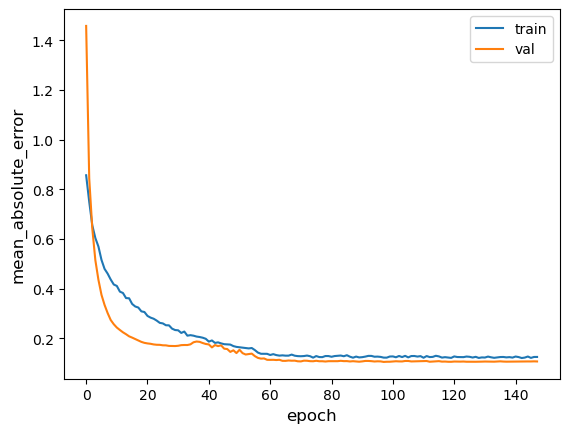

167/167 [==============================] - 0s 365us/step - loss: 0.0293 - mean_absolute_error: 0.1043
Test accuracy 0.10432323068380356
Test loss 0.029269197955727577


In [81]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [82]:
y_test_pred = multi_dense_model.predict(x_test)

In [83]:
rmse(y_test.values, y_test_pred)

0.296210266242924

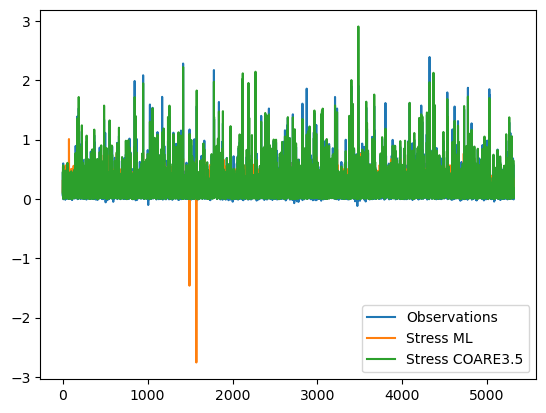

In [84]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

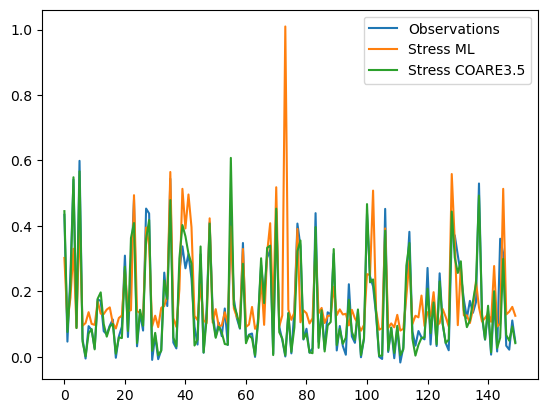

In [85]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

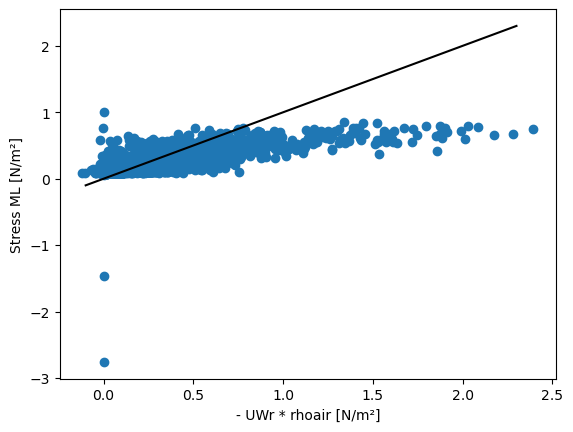

In [86]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [87]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76869907],
       [0.76869907, 1.        ]])

In [88]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

In [89]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [90]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [91]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 1.1505 - mean_absolute_error: 0.8098 - val_loss: 2.7437 - val_mean_absolute_error: 1.5255
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.8540 - mean_absolute_error: 0.7113 - val_loss: 0.7135 - val_mean_absolute_error: 0.6349
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6950 - mean_absolute_error: 0.6444 - val_loss: 0.3205 - val_mean_absolute_error: 0.3199
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5872 - mean_absolute_error: 0.5840 - val_loss: 0.2390 - val_mean_absolute_error: 0.2361
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4576 - mean_absolute_error: 0.5231 - val_loss: 0.2239 - val_mean_absolute_error: 0.2069
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3927 - mean_absolute_error: 0.4861 - val_loss: 0.2250 - val_mean_absolute_error: 0.1931
Epoch 7/500
56/56 [===

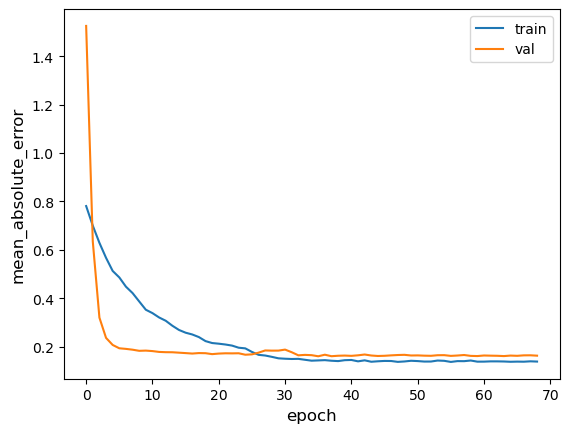

167/167 [==============================] - 0s 386us/step - loss: 0.4726 - mean_absolute_error: 0.1332
Test accuracy 0.13323938846588135
Test loss 0.4725802540779114


In [92]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [93]:
y_test_pred = multi_dense_model.predict(x_test)

In [94]:
rmse(y_test.values, y_test_pred)

0.7224101859796764

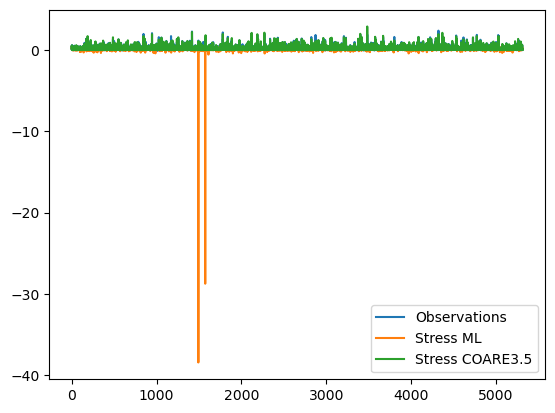

In [95]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

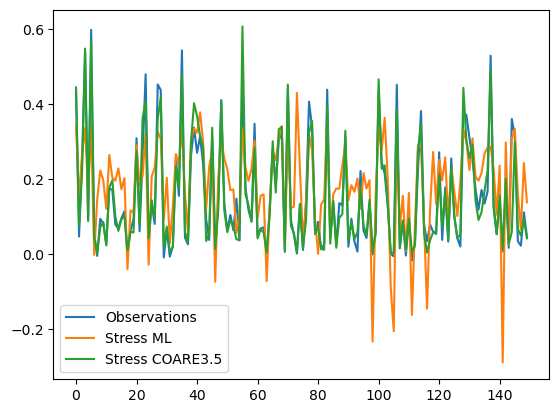

In [96]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

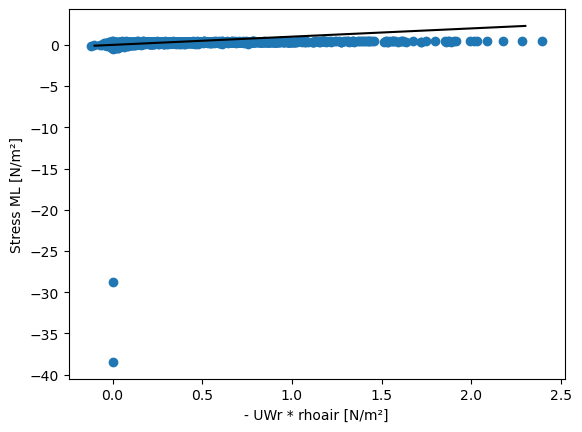

In [97]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [98]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.14241022],
       [0.14241022, 1.        ]])

In [99]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

In [100]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [101]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [102]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 1s 3ms/step - loss: 0.7208 - mean_absolute_error: 0.6973 - val_loss: 0.1968 - val_mean_absolute_error: 0.3566
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4294 - mean_absolute_error: 0.5263 - val_loss: 0.1344 - val_mean_absolute_error: 0.2935
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2932 - mean_absolute_error: 0.4346 - val_loss: 0.1106 - val_mean_absolute_error: 0.2547
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2178 - mean_absolute_error: 0.3681 - val_loss: 0.0790 - val_mean_absolute_error: 0.2042
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1888 - mean_absolute_error: 0.3237 - val_loss: 0.0709 - val_mean_absolute_error: 0.1821
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1559 - mean_absolute_error: 0.3037 - val_loss: 0.0682 - val_mean_absolute_error: 0.1724
Epoch 7/500
56/56 [===

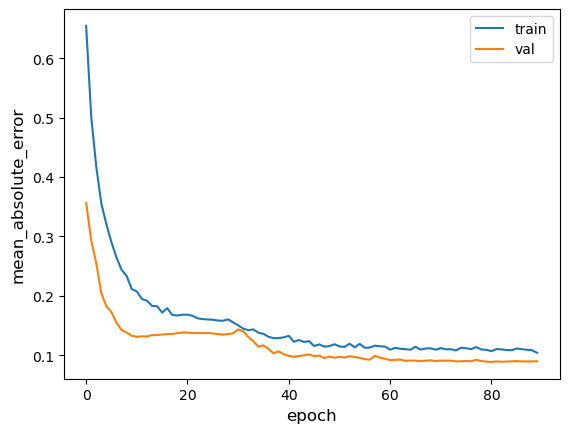

167/167 [==============================] - 0s 381us/step - loss: 0.0380 - mean_absolute_error: 0.0835
Test accuracy 0.08348260074853897
Test loss 0.038047146052122116


In [103]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [104]:
y_test_pred = multi_dense_model.predict(x_test)

In [105]:
rmse(y_test.values, y_test_pred)

0.32926420467900686

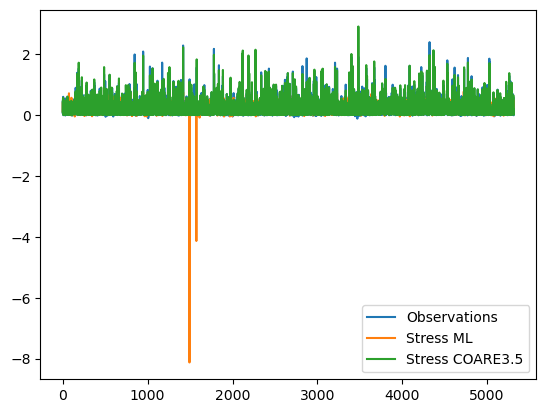

In [106]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

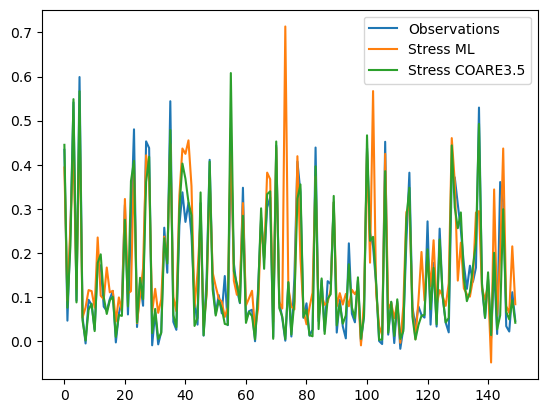

In [107]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

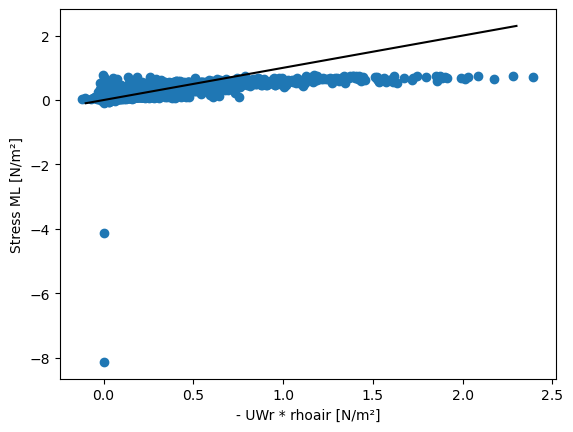

In [108]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [109]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.66442607],
       [0.66442607, 1.        ]])

In [110]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

In [111]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [112]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [113]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 2.2870 - mean_absolute_error: 1.2721 - val_loss: 8.6443 - val_mean_absolute_error: 1.5847
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 1.6829 - mean_absolute_error: 1.0693 - val_loss: 3.8754 - val_mean_absolute_error: 1.1031
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 1.2190 - mean_absolute_error: 0.8777 - val_loss: 2.2927 - val_mean_absolute_error: 0.8448
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.9537 - mean_absolute_error: 0.7800 - val_loss: 1.6289 - val_mean_absolute_error: 0.6896
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7276 - mean_absolute_error: 0.6770 - val_loss: 1.2578 - val_mean_absolute_error: 0.5792
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5837 - mean_absolute_error: 0.6082 - val_loss: 1.0078 - val_mean_absolute_error: 0.4753
Epoch 7/500
56/56 [===

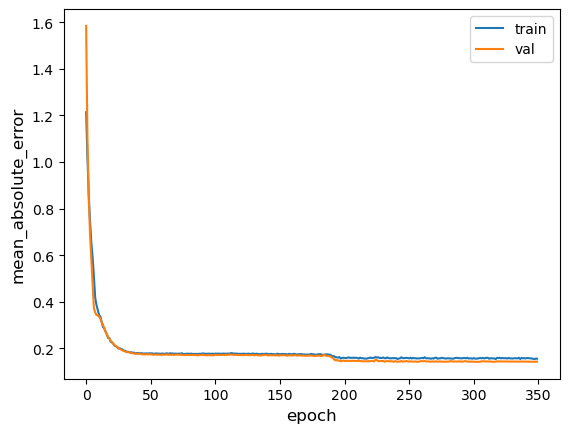

167/167 [==============================] - 0s 345us/step - loss: 0.0484 - mean_absolute_error: 0.1453
Test accuracy 0.1453428417444229
Test loss 0.04840337112545967


In [114]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [115]:
y_test_pred = multi_dense_model.predict(x_test)

In [116]:
rmse(y_test.values, y_test_pred)

0.271526035180892

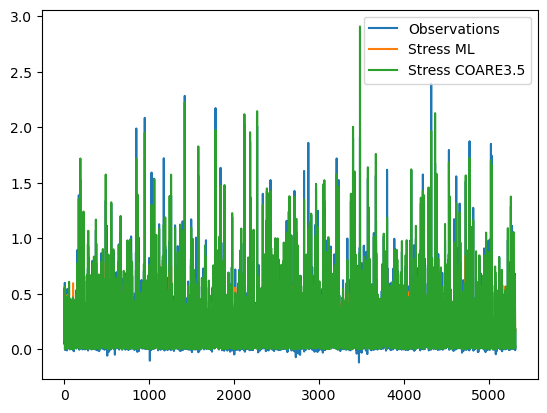

In [117]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

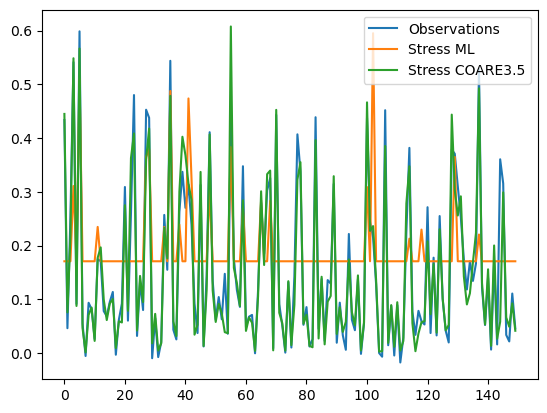

In [118]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

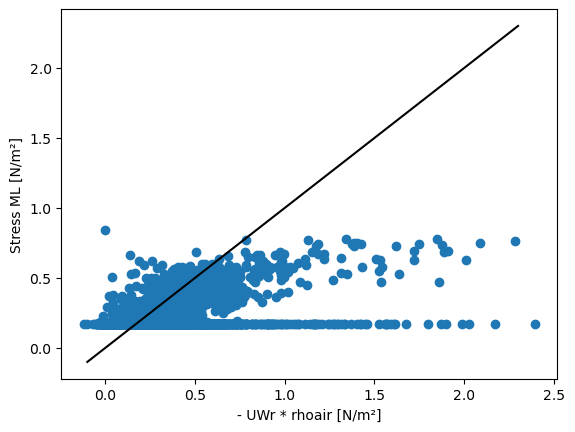

In [119]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [120]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.5518413],
       [0.5518413, 1.       ]])

In [121]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97676034],
       [0.97676034, 1.        ]])

In [122]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [123]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 0.4398 - mean_absolute_error: 0.5187 - val_loss: 0.7636 - val_mean_absolute_error: 0.7890
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2779 - mean_absolute_error: 0.4030 - val_loss: 0.1703 - val_mean_absolute_error: 0.3249
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2272 - mean_absolute_error: 0.3624 - val_loss: 0.0960 - val_mean_absolute_error: 0.2102
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1608 - mean_absolute_error: 0.3030 - val_loss: 0.0790 - val_mean_absolute_error: 0.1742
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1483 - mean_absolute_error: 0.2867 - val_loss: 0.0728 - val_mean_absolute_error: 0.1603
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1270 - mean_absolute_error: 0.2619 - val_loss: 0.0700 - val_mean_absolute_error: 0.1551
Epoch 7/500
56/56 [===

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.6),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)